In [ ]:

import keras
keras.__version__

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [4]:
model=tf.keras.models.load_model('./models/object_detection_latest.h5')
print("model loaded")

model loaded


In [27]:
#checking whether the model can load the bounding box
path='./images/Cars107.png'
image=load_img(path)
image=np.array(image,dtype=np.uint8)#8 bit arrays
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255#divide for normalising

In [28]:
h,w,d=image.shape
print('Height of image = ',h)
print('Width of image = ',w)

Height of image =  270
Width of image =  471


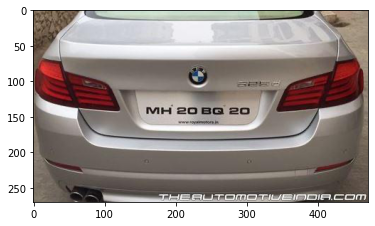

In [29]:
plt.imshow(image)
plt.show()

In [30]:
image_arr_224.shape


(224, 224, 3)

In [31]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [32]:
#predicting
coords=model.predict(test_arr)
coords

1/1 [==============================] - 0s 80ms/step


array([[0.30683354, 0.6625102 , 0.44579846, 0.59191597]], dtype=float32)

In [33]:
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords
coords=coords.astype(np.int32)

(144, 120) (312, 159)


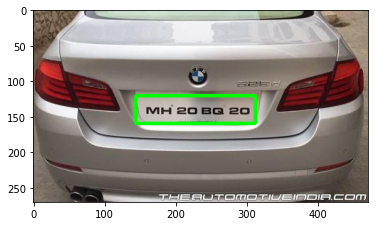

In [34]:
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.imshow(image)
plt.show()

In [35]:
#for all images


path='./images/Cars107.png'
def object_detection(path):
    
        image=load_img(path)
        image=np.array(image,dtype=np.uint8)#8 bit arrays
        image1=load_img(path,target_size=(224,224))
        image_arr_224=img_to_array(image1)/255#divide for normalising
        h,w,d=image.shape
        test_arr=image_arr_224.reshape(1,224,224,3)
        #predicting
        coords=model.predict(test_arr)
        denorm=np.array([w,w,h,h])
        coords=coords*denorm
        coords=coords.astype(np.int32)
        xmin,xmax,ymin,ymax=coords[0]
        pt1=(xmin,ymin)
        pt2=(xmax,ymax)
        print(pt1,pt2)
        cv2.rectangle(image,pt1,pt2,(0,255,0),3)
        return image,coords

1/1 [==============================] - 0s 80ms/step
(144, 120) (312, 159)


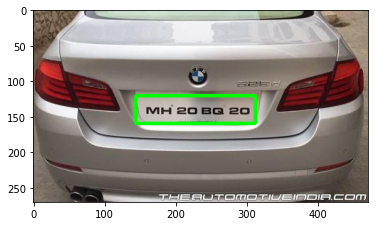

In [36]:
path='./images/Cars107.png'
image,coordinates=object_detection(path)
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 78ms/step
(113, 121) (277, 161)


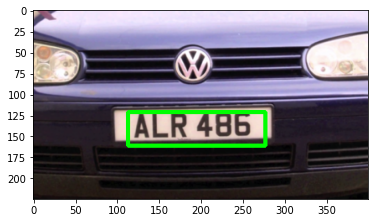

In [73]:
import pytesseract
path='./images/Cars318.png'
image,coordinates=object_detection(path)
plt.imshow(image)
plt.show()

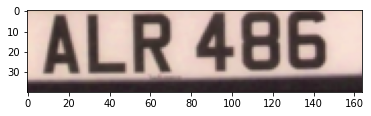

In [74]:
#getting only the number plate for ocr
img=np.array(load_img(path))
xmin,xmax,ymin,ymax=coordinates[0]
numberplate_region=img[ymin:ymax,xmin:xmax]
plt.imshow(numberplate_region)
plt.show()


In [76]:
#ocr part
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
characters=pt.image_to_string(numberplate_region)
print(characters)

ALR 486


